<a id="title_ID"></a>
# JWST Pipeline Validation Notebook: 
# calwebb_coron3

<span style="color:red"> **Instruments Affected**</span>: MIRI, NIRCam 

### Table of Contents

<div style="text-align: left"> 
    
<br> [Introduction\*](#intro)
<br> [JWST CalWG Algorithm\*](#algorithm)
<br> [Test Description\*](#description)
<br> [Data Description\*](#data_descr)
<br> [Imports\*](#imports)
<br> [Set up Temporary Directory\*](#temp)
<br> [Loading the Data\*](#data_load)
<br> [Run the Pipeline](#pipeline)
<br> [Perform Tests or Visualization](#testing) 
<br> [About This Notebook\*](#about)
<br>    

</div>

<a id="intro"></a>
# Introduction

This notebook validates the stage 3 coronagraphic pipeline (calwebb_coron3).

Step description: https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_coron3.html

Pipeline code: https://github.com/spacetelescope/jwst/tree/master/jwst/coron

[Top of Page](#title_ID)

<a id="algorithm"></a>
# JWST CalWG Algorithm

The coron3 pipeline consists of the following steps:

1) outlier_detection: identifies bad pixels/outliers in the input images

2) stack_refs: stacks the reference PSFs together into a 3D data cube

3) align_refs: aligns/shifts the stack of reference PSFs to the target PSFs

4) klip: uses the Karhunen-Loeve Image Plane (KLIP) algorithm to fit and subtract an optimal PSF from the target PSFs

5) resample: combines the PSF-subtracted target images into a single product

[Top of Page](#title_ID)

<a id="description"></a>
# Test Description

All steps of the calwebb_coron3 pipeline are run on the simulated input data.

The tests will ensure basic header/data info in the output images is as expected (e.g. image dimensions, number of outliers detected), as well as inspect the quality of the PSF alignments and the PSF-subtracted images.


[Top of Page](#title_ID)

<a id="data_descr"></a>
# Data Description

The NIRCam test data consists of 9 small-grid dithered reference PSFs (2 ints, 10 groups) as well as 1 target PSF (10 ints, 10 groups) with 2 companions. The instrument setup for these exposures is as follows:

DETECTOR = NRCA2

SUBARRAY = SUB640A210R

FILTER = F210M

PUPIL = MASKRND

CORONMSK = MASKA210R

READPATT = RAPID

[Top of Page](#title_ID)

<a id="imports"></a>
# Imports

* astropy.io for opening fits files
* ci_watson.artifactory_helpers to retrieve test data from artifactory
* glob for making file lists
* jwst.pipeline.calwebb_coron3 is the pipeline step being tested
* matplotlib.pyplot to generate plots
* os for file handling
* tempfile to create a temporary processing directory


In [1]:
from astropy.io import fits
from ci_watson.artifactory_helpers import get_bigdata
import glob
from jwst.pipeline.calwebb_coron3 import Coron3Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
from tempfile import TemporaryDirectory

2021-04-09 18:55:23,447 - stpipe - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/photutils/detection/findstars.py:33: AstropyDeprecationWarning: _StarFinderKernel was moved to the photutils.detection._utils module. Please update your import statement.
  warnings.warn(f'{name} was moved to the {deprecated[name]} module. '



[Top of Page](#title_ID)

<a id="temp"></a>
# Set up Temporary Directory


In [2]:
# Create a temporary directory to hold notebook output, and change the working directory to that directory

data_dir = TemporaryDirectory()
os.chdir(data_dir.name)

[Top of Page](#title_ID)

<a id="data_load"></a>
# Loading the Data

In [3]:
# Copy the test files from Artifactory into the temporary directory

files = ['lib_ss20_sgd1_calints.fits', 'lib_ss20_sgd2_calints.fits', 'lib_ss20_sgd3_calints.fits',
         'lib_ss20_sgd4_calints.fits', 'lib_ss20_sgd5_calints.fits', 'lib_ss20_sgd6_calints.fits',
         'lib_ss20_sgd7_calints.fits', 'lib_ss20_sgd8_calints.fits', 'lib_ss20_sgd9_calints.fits',
         'lib_ss20_target_roll1_calints.fits', 'coro_test.asn']
for f in files:
    file = get_bigdata('jwst_validation_notebooks',
                       'validation_data',
                       'calwebb_coron3',
                       'coron3_nircam_test', f)

[Top of Page](#title_ID)

<a id="pipeline"></a>
# Run the Pipeline

In [4]:
# Initialize the coron3 pipeline
m = Coron3Pipeline()
m.save_results = True

# Run the pipeline
m.run('coro_test.asn')

2021-04-09 18:55:32,571 - stpipe.Coron3Pipeline - INFO - Coron3Pipeline instance created.


2021-04-09 18:55:32,572 - stpipe.Coron3Pipeline.stack_refs - INFO - StackRefsStep instance created.


2021-04-09 18:55:32,574 - stpipe.Coron3Pipeline.align_refs - INFO - AlignRefsStep instance created.


2021-04-09 18:55:32,575 - stpipe.Coron3Pipeline.klip - INFO - KlipStep instance created.


2021-04-09 18:55:32,576 - stpipe.Coron3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.


2021-04-09 18:55:32,578 - stpipe.Coron3Pipeline.resample - INFO - ResampleStep instance created.


2021-04-09 18:55:32,706 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline running with args ('coro_test.asn',).


2021-04-09 18:55:32,711 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'steps': {'stack_refs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'align_refs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'median_box_length': 3, 'bad_bits': 'DO_NOT_USE'}, 'klip': {'pre_hooks': [], 'post_hooks': [], 'output_file': No

2021-04-09 18:55:32,711 - stpipe.Coron3Pipeline - INFO - Starting calwebb_coron3 ...


2021-04-09 18:55:33,087 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd1_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-04-09 18:55:34,654 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-04-09 18:55:34,655 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-04-09 18:55:34,777 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd2_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-04-09 18:55:34,780 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-04-09 18:55:34,781 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-04-09 18:55:34,902 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd3_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-04-09 18:55:34,905 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-04-09 18:55:34,906 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-04-09 18:55:35,026 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd4_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-04-09 18:55:35,029 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-04-09 18:55:35,030 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-04-09 18:55:35,150 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd5_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-04-09 18:55:35,153 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-04-09 18:55:35,154 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-04-09 18:55:35,277 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd6_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-04-09 18:55:35,280 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-04-09 18:55:35,281 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-04-09 18:55:35,437 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd7_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-04-09 18:55:35,440 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-04-09 18:55:35,441 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-04-09 18:55:35,563 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd8_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-04-09 18:55:35,566 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-04-09 18:55:35,567 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-04-09 18:55:35,696 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd9_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-04-09 18:55:35,699 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-04-09 18:55:35,700 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-04-09 18:55:36,006 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_target_roll1_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-04-09 18:55:36,009 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-04-09 18:55:36,010 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-04-09 18:55:37,298 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd1_calints.fits>,).


2021-04-09 18:55:37,300 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-04-09 18:55:37,307 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-04-09 18:55:37,336 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:153: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-04-09 18:55:37,401 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-04-09 18:55:37,476 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-04-09 18:55:37,860 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd1_c1001_crfints.fits


2021-04-09 18:55:37,860 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-04-09 18:55:37,982 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd2_calints.fits>,).


2021-04-09 18:55:37,984 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-04-09 18:55:38,002 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-04-09 18:55:38,019 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:153: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-04-09 18:55:38,081 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-04-09 18:55:38,133 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-04-09 18:55:38,395 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd2_c1001_crfints.fits


2021-04-09 18:55:38,396 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-04-09 18:55:38,485 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd3_calints.fits>,).


2021-04-09 18:55:38,487 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-04-09 18:55:38,496 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-04-09 18:55:38,512 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:153: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-04-09 18:55:38,575 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-04-09 18:55:38,627 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-04-09 18:55:38,865 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd3_c1001_crfints.fits


2021-04-09 18:55:38,866 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-04-09 18:55:38,956 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd4_calints.fits>,).


2021-04-09 18:55:38,958 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-04-09 18:55:38,966 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-04-09 18:55:38,982 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:153: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-04-09 18:55:39,044 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-04-09 18:55:39,097 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-04-09 18:55:39,406 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd4_c1001_crfints.fits


2021-04-09 18:55:39,407 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-04-09 18:55:39,503 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd5_calints.fits>,).


2021-04-09 18:55:39,505 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-04-09 18:55:39,512 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-04-09 18:55:39,528 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:153: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-04-09 18:55:39,658 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-04-09 18:55:39,771 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-04-09 18:55:40,095 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd5_c1001_crfints.fits


2021-04-09 18:55:40,096 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-04-09 18:55:40,185 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd6_calints.fits>,).


2021-04-09 18:55:40,186 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-04-09 18:55:40,193 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-04-09 18:55:40,209 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:153: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-04-09 18:55:40,269 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-04-09 18:55:40,320 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-04-09 18:55:40,558 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd6_c1001_crfints.fits


2021-04-09 18:55:40,559 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-04-09 18:55:40,715 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd7_calints.fits>,).


2021-04-09 18:55:40,719 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-04-09 18:55:40,727 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-04-09 18:55:40,759 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:153: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-04-09 18:55:40,877 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-04-09 18:55:40,979 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-04-09 18:55:41,234 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd7_c1001_crfints.fits


2021-04-09 18:55:41,235 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-04-09 18:55:41,379 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd8_calints.fits>,).


2021-04-09 18:55:41,381 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-04-09 18:55:41,388 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-04-09 18:55:41,403 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:153: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-04-09 18:55:41,465 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-04-09 18:55:41,516 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-04-09 18:55:41,763 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd8_c1001_crfints.fits


2021-04-09 18:55:41,764 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-04-09 18:55:41,853 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd9_calints.fits>,).


2021-04-09 18:55:41,855 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-04-09 18:55:41,861 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-04-09 18:55:41,877 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:153: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-04-09 18:55:41,939 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-04-09 18:55:41,990 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-04-09 18:55:42,231 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd9_c1001_crfints.fits


2021-04-09 18:55:42,231 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-04-09 18:55:42,319 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs running with args (<ModelContainer>,).


2021-04-09 18:55:42,321 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-09 18:55:42,365 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 1 to output stack


2021-04-09 18:55:42,376 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 2 to output stack


2021-04-09 18:55:42,387 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 3 to output stack


2021-04-09 18:55:42,397 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 4 to output stack


2021-04-09 18:55:42,408 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 5 to output stack


2021-04-09 18:55:42,418 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 6 to output stack


2021-04-09 18:55:42,429 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 7 to output stack


2021-04-09 18:55:42,440 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 8 to output stack


2021-04-09 18:55:42,448 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 9 to output stack


2021-04-09 18:55:42,525 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs done


2021-04-09 18:55:42,675 - stpipe.Coron3Pipeline - INFO - Saved model in coro_test_psfstack.fits


2021-04-09 18:55:42,908 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(10, 640, 640) from lib_ss20_target_roll1_calints.fits>,).


2021-04-09 18:55:42,909 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-04-09 18:55:42,916 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 10 inputs


2021-04-09 18:55:42,931 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:153: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-04-09 18:55:43,214 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 10 images


2021-04-09 18:55:43,451 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-04-09 18:55:44,485 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_target_roll1_c1001_crfints.fits


2021-04-09 18:55:44,494 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-04-09 18:55:44,749 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs running with args (<CubeModel(10, 640, 640) from lib_ss20_target_roll1_c1001_crfints.fits>, <CubeModel(18, 640, 640) from coro_test_psfstack.fits>).


2021-04-09 18:55:44,750 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'median_box_length': 3, 'bad_bits': 'DO_NOT_USE'}


2021-04-09 18:55:44,768 - stpipe.Coron3Pipeline.align_refs - INFO - Using PSFMASK reference file /grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits


2021-04-09 18:55:44,833 - stpipe.Coron3Pipeline.align_refs - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,



2021-04-09 18:55:44,834 - stpipe.Coron3Pipeline.align_refs - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)



2021-04-09 18:55:44,835 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,845 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,856 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,867 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,877 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,888 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,898 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,909 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,919 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,929 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,939 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,948 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,957 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,967 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,976 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,985 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:44,994 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,003 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,008 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,009 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,048 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,052 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,059 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,070 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,076 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,088 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,098 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,131 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,137 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,143 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,144 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,144 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,145 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,151 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,187 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,192 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,223 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,248 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,248 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,274 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,275 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,275 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,275 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,276 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,276 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,297 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,309 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,323 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,346 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,355 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,357 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,409 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,410 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,410 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,411 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,422 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,441 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,461 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,461 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,472 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,479 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,487 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,537 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,538 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,538 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,554 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,596 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,616 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,668 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,668 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,669 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,669 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,670 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,670 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,694 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,733 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,745 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,771 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,795 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,795 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,796 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,811 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,812 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,817 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,828 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,846 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,862 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,870 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,918 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,919 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,919 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,919 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,920 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,921 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,921 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,921 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,973 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:45,997 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,024 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,034 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,051 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,052 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,052 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,052 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,078 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,084 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,095 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,115 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,131 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,146 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,168 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,182 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,183 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,183 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,183 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,233 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,247 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,251 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,255 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,276 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:55:46,293 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-04-09 18:59:39,441 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs done


2021-04-09 18:59:40,982 - stpipe.Coron3Pipeline - INFO - Saved model in lib_ss20_target_roll1_c1001_psfalign.fits


2021-04-09 18:59:41,188 - stpipe.Coron3Pipeline.klip - INFO - Step klip running with args (<CubeModel(10, 640, 640) from lib_ss20_target_roll1_c1001_crfints.fits>, <QuadModel(10, 18, 640, 640) from lib_ss20_target_roll1_c1001_psfalign.fits>).


2021-04-09 18:59:41,190 - stpipe.Coron3Pipeline.klip - INFO - Step klip parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'truncate': 50}


2021-04-09 18:59:41,198 - stpipe.Coron3Pipeline.klip - INFO - KL transform truncation = 50


2021-04-09 18:59:46,107 - stpipe.Coron3Pipeline.klip - INFO - Step klip done


2021-04-09 18:59:46,345 - stpipe.Coron3Pipeline - INFO - Saved model in lib_ss20_target_roll1_c1001_psfsub.fits


2021-04-09 18:59:46,737 - stpipe.Coron3Pipeline.resample - INFO - Step resample running with args (<ModelContainer>,).


2021-04-09 18:59:46,739 - stpipe.Coron3Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'pixel_scale_ratio': 1.0, 'single': False, 'blendheaders': False, 'allowed_memory': None}


2021-04-09 18:59:46,752 - stpipe.Coron3Pipeline.resample - INFO - Drizpars reference file: /grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits


2021-04-09 18:59:47,169 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-04-09 18:59:47,682 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-04-09 18:59:48,212 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-04-09 18:59:48,744 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-04-09 18:59:49,268 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-04-09 18:59:49,796 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-04-09 18:59:50,461 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-04-09 18:59:51,022 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-04-09 18:59:51,568 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-04-09 18:59:52,099 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-04-09 18:59:52,361 - stpipe.Coron3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/gwcs/utils.py:72: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indx = np.asarray(np.floor(np.asarray(value) + 0.5), dtype=np.int)



2021-04-09 18:59:52,363 - stpipe.Coron3Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  346.825736745 21.254563694 346.825708926 21.260995901 346.818843479 21.260969972 346.818871598 21.254537767


2021-04-09 18:59:52,365 - stpipe.Coron3Pipeline.resample - INFO - Step resample done


2021-04-09 18:59:53,375 - stpipe.Coron3Pipeline - INFO - Saved model in coro_test_i2d.fits


2021-04-09 18:59:53,376 - stpipe.Coron3Pipeline - INFO - ...ending calwebb_coron3


2021-04-09 18:59:53,376 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline done


[Top of Page](#title_ID)

<a id="testing"></a>
# Perform Tests

In [5]:
# Make sure the PSF stack/alignment/subtraction images have the expected data dimensions.
# The expected dimensions for the psf stack images are:
# NX x NY x Number of Reference PSF INTS
# The expected dimensions for the psf alignment images are:
# NX x NY x Number of Reference PSF INTS x Number of Target INTS
# The expected dimensions for the psf subtraction images are:
# NX x NY x Number of Target INTS

f_stack = 'coro_test_psfstack.fits'
f_align = 'lib_ss20_target_roll1_c1001_psfalign.fits'
f_sub = 'lib_ss20_target_roll1_c1001_psfsub.fits'
files = [f_stack, f_align, f_sub]
expected_shapes = [(18, 640, 640), (10, 18, 640, 640), (10, 640, 640)]
for f,shape in zip(files, expected_shapes):
    for ext in ['SCI', 'ERR', 'DQ']:
        data = fits.getdata(f, ext)
        if data.shape != shape:
            print('WARNING: unexpected data shape in {} {}: {}'.format(f, ext, data.shape))

2021-04-09 18:59:53,382 - stpipe - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



In [6]:
# Make sure a reasonable number of outlier pixels are flagged in each exposure (less than 1%)

files = sorted(glob.glob('*crfints.fits'))
for f in files:
    print(os.path.basename(f))
    dq = fits.getdata(f, 'DQ')
    nints, ny, nx = dq.shape
    for integration in range(nints):
        dq_int = dq[integration]
        n_outlier = len(dq_int[dq_int&16!=0])
        print('\tOutlier pixels in Int {}: {} ({:.5f}% of image)'.format(integration+1,
              n_outlier, n_outlier/(ny*nx)*100))

lib_ss20_sgd1_c1001_crfints.fits
	Outlier pixels in Int 1: 5 (0.00122% of image)
	Outlier pixels in Int 2: 5 (0.00122% of image)
lib_ss20_sgd2_c1001_crfints.fits
	Outlier pixels in Int 1: 3 (0.00073% of image)
	Outlier pixels in Int 2: 4 (0.00098% of image)
lib_ss20_sgd3_c1001_crfints.fits
	Outlier pixels in Int 1: 5 (0.00122% of image)
	Outlier pixels in Int 2: 4 (0.00098% of image)
lib_ss20_sgd4_c1001_crfints.fits
	Outlier pixels in Int 1: 5 (0.00122% of image)
	Outlier pixels in Int 2: 5 (0.00122% of image)
lib_ss20_sgd5_c1001_crfints.fits
	Outlier pixels in Int 1: 5 (0.00122% of image)
	Outlier pixels in Int 2: 4 (0.00098% of image)
lib_ss20_sgd6_c1001_crfints.fits
	Outlier pixels in Int 1: 4 (0.00098% of image)
	Outlier pixels in Int 2: 4 (0.00098% of image)
lib_ss20_sgd7_c1001_crfints.fits
	Outlier pixels in Int 1: 5 (0.00122% of image)
	Outlier pixels in Int 2: 4 (0.00098% of image)
lib_ss20_sgd8_c1001_crfints.fits
	Outlier pixels in Int 1: 5 (0.00122% of image)
	Outlier pixels 

Text(0, 0.5, 'PSF - Mean PSF [MJy/sr]')

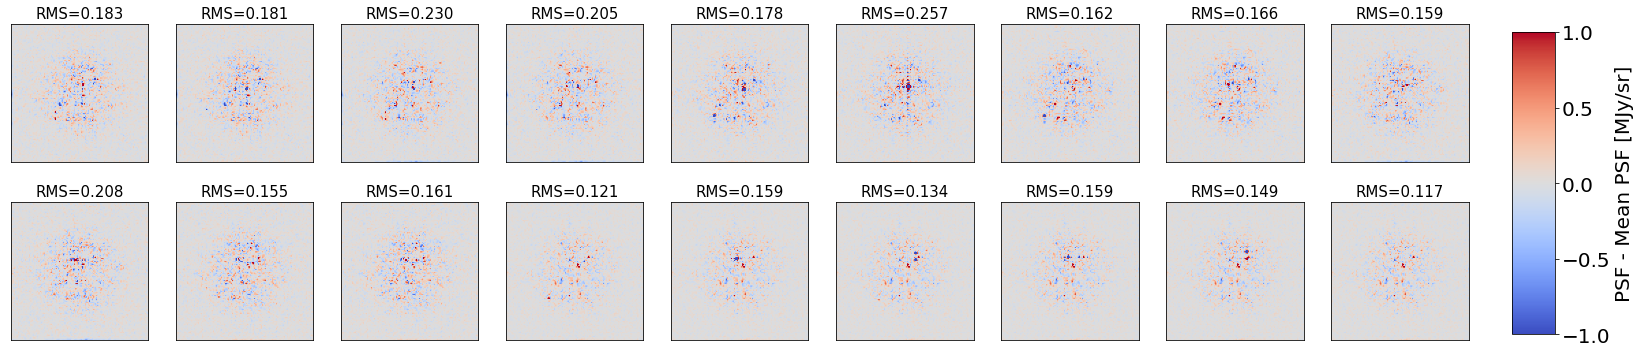

In [7]:
# Make sure the PSFs were aligned properly (i.e. residual alignment RMS should be <0.5 MJr/sr). 
# Each frame represents one PSF-aligned reference integration. There shouldn't be any severe "ringing" 
# effect from outlier pixels (i.e. cross pattern), as these should have been corrected in earlier steps.
# There also shouldn't be any PSF pattern offsets visible in the images, only salt/pepper noise.

fig, axes = plt.subplots(2, 9, figsize=(30,6))
y1, y2, x1, x2 = (269, 370, 269, 370)  # a cutout region around the PSF

data = fits.getdata(f_align, 'SCI')
mean = np.mean(data[0], axis=0)
for i, ax in enumerate(axes.flatten()):
    diff = data[0, i] - mean
    diff = diff[y1:y2, x1:x2]
    r = np.sqrt(np.mean(diff**2))
    im = ax.imshow(diff, cmap='coolwarm', vmin=-1, vmax=1, origin='lower')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title('RMS={:.3f}'.format(r),size=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20) 
cbar.ax.set_ylabel('PSF - Mean PSF [MJy/sr]', size=20)

Text(0, 0.5, 'Residual PSF [MJy/sr]')

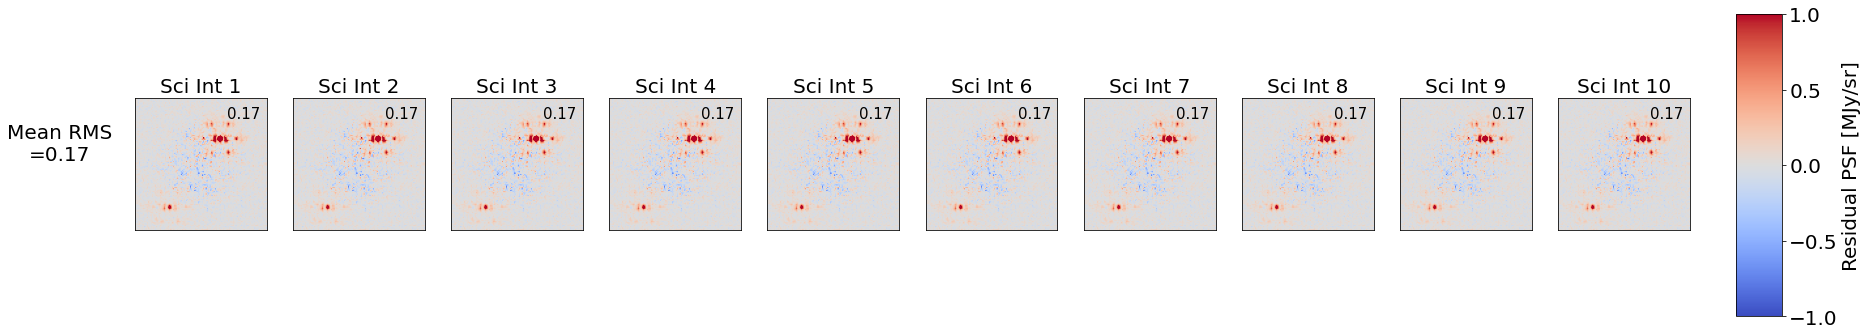

In [8]:
# Make sure the PSF fitting/subtraction worked properly. The 2 companions should be obviously visible
# in red in the top right/bottom left of the image, and the remainder of the image should be ~gray 
# (i.e. residual RMS should be <0.5 MJy/sr).

fig, axes = plt.subplots(1,10, figsize=(32, 6))
y1, y2, x1, x2 = (269, 370, 269, 370)  # a cutout region around the PSF

data = fits.getdata(f_sub, 'SCI')
rms = []
for i, ax in enumerate(axes):
    d = data[i, y1:y2, x1:x2]
    r = np.sqrt(np.mean(d**2))
    im = ax.imshow(d, cmap='coolwarm', vmin=-1, vmax=1, origin='lower')
    ax.set_title('Sci Int {}'.format(i+1), size=20)
    ax.set_yticks([])
    ax.set_xticks([])
    rms.append(r)
    ax.text(70, 85, '{:.2f}'.format(r), size=15)
axes[0].set_ylabel('Mean RMS\n={:.2f}'.format(np.mean(rms)), size=20, rotation='horizontal', labelpad=75)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20) 
cbar.ax.set_ylabel('Residual PSF [MJy/sr]', size=20)

Text(0.5, 1.0, 'Residual RMS=0.101')

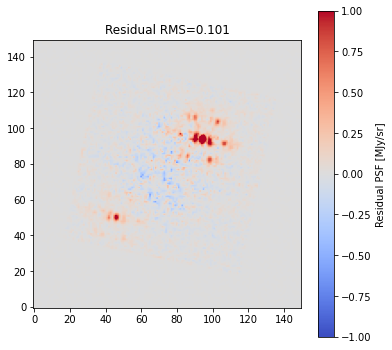

In [9]:
# Make sure the final, combined PSF-subtracted image looks good as well (should just look like 
# a cleaner combination of the above, with residual RMS <0.15)

plt.figure(figsize=(6, 6))
data = fits.getdata('coro_test_i2d.fits', 'SCI')
data = data[300:450, 300:450]
plt.imshow(data, cmap='coolwarm', vmin=-1, vmax=1, origin='lower')
plt.colorbar(label='Residual PSF [MJy/sr]')
rms = np.sqrt(np.mean(data**2))
plt.title('Residual RMS={:.3f}'.format(rms))

[Top of Page](#title_ID)

<a id="about"></a>
## About this Notebook
**Author:** Ben Sunnquist, Staff Scientist, NIRCam
<br>**Updated On:** 02/10/2021

[Top of Page](#title_ID)
<img style="float: right;" src="./stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="stsci_pri_combo_mark_horizonal_white_bkgd" width="200px"/> 